# **Referencias**

1. https://mappinggis.com/2024/11/5-librerias-de-python-para-trabajar-con-openstreetmap/

2. https://medium.com/@revathyponn/visualise-your-favourite-citys-road-network-using-python-12254d605ed8

3. https://realpython-com.translate.goog/pandas-dataframe/?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es

# **Aplicación de $BFS$, $DFS$, $A^*$**

Para el presente trabajo, se utilizarán las librerías `osmnx`, `networkx` y `folium` de `Python` para trabajar con los grafos y con las búsquedas no informadas e informadas. Para instalar dichas librerías, se debe ejecutar la siguiente líena de código:

```bash
    !pip install osmnx networkx folium
```

Luego, deben realizarse los siguientes imports de las librerías:

```python
    import osmnx as ox
    import folium
    import networkx as nx
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
```

## **1 - Análisis Exploratorio del Dataset `OpenStreetMap`**

Para el análisis exploratorio del dataset se pide:

1. **Identificar una provincia/ciudad de Argentina** con el parámetro `network_type='drive'` para indicar el tipo de red de calles a descargar. Por ej.:

    ```python
        city = "<NOMBRE-provincia-ciudad>, Argentina" # Aquí, "NOMBRE-provincia-ciudad" tiene que ser el nombre de una provincia y/o ciudad válida en Argentina, por ej., "Chubut"

        # Obtenemos el grafo como un objeto ox
        graph_city = ox.graph_from_place(city, network_type="drive")

        # Graficamos el grafo para visualización
        ox.plot_graph(graph_city)
    ```

2. Convertir el grafo a `GeoDataFrame` utilizando la función:

    ```python
        nodes, edges = ox.graph_to_gdfs(graph_city) # edges es un dataframe en donde está contenida toda la información del grafo descargado antenriormente
    ```

3. Mostrar un `dataframe` con **al menos 50 calles con los siguientes datos:**

    a. **Nombre de Calle.**

    b. **Tipo de Calle: Avenida, Ruta, etc.**

    c. **Tipo de Dirección: Contramano o no.**

    > Para obtener los valores descritos, recordar que el dataframe `edges` contiene las siguientes columnas: 1) `"name"` (nombre de la calle); 2) `"highway"` (tipo de calle) y 3) `"oneway"` (dirección de la calle - False si no es doblemano). Para ver todas las columnas de `edges` usar `edges.head()`.

In [ ]:
!pip install osmnx==1.9.3 networkx folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.4 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import folium
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

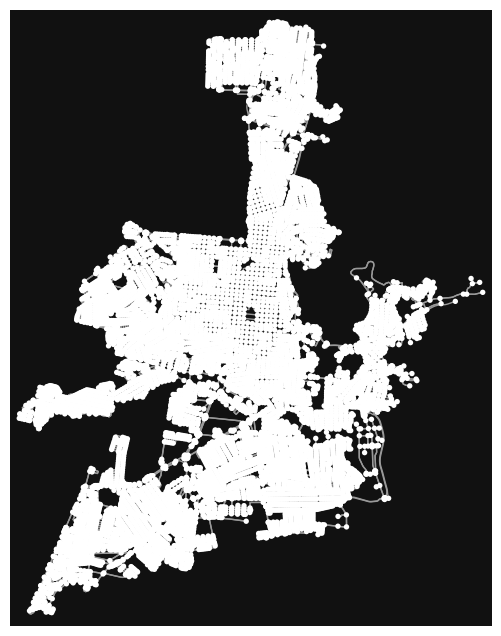

,Nombre_Calle,Tipo_Calle,Direccion_Doblemano
0,NaN,residential,False
1,Avenida Ciudad de Asuncion,residential,False
2,Avenida Ciudad de Asuncion,residential,True
3,NaN,residential,False
4,NaN,residential,False
5,NaN,residential,False
6,La Merced,residential,False
7,El Juncal,residential,False
8,El Juncal,residential,False
9,"[20 de Febrero, Paseo Florentino Ameghino]",residential,True


In [ ]:
city = "Salta, Salta, Argentina"

# Obtenemos el grafo como un objeto ox
graph_city = ox.graph_from_place(city, network_type="drive", simplify=True)

# Graficamos el grafo para visualización
ox.plot_graph(graph_city)

# Convertimos el grafo a GeoDataFrame
nodes, edges = ox.graph_to_gdfs(graph_city) # edges es un geodataframe en donde está contenida toda la información del grafo como objeto

# Reseteamos el índice para tener u, v, key como columnas
edges = edges.reset_index()

edges[["name","highway","oneway"]].head(50).rename(columns={
    "u": "Nodo_Origen",
    "v": "Nodo_Destino",
    "oneway": "Direccion_Doblemano",
    "highway": "Tipo_Calle",
    "name": "Nombre_Calle"
}) #muestra las columnas del dataframe edges



## **2 - Busqueda de Rutas**

1. **Se seleccionan al menos 5 calles que sean lo suficientemente distantes entre sí (por ej., ir desde la calle Caseros (ubicada en el Centro de Rosario del Lerma) hasta la calle "Tellez" del "Barrio el Mirador - Salta Capital").**

2. Se aplican los algoritmos de $BFS$, $DFS$ y $A^*$ **usando la implementación de la librería `networkx`, utilizando la siguiente estructura para mostrar los resultados obtenidos:**

    | Algoritmo | Tiempo (s) | Nodos explorados | Longitud del camino |
    |-----------|------------|------------------|----------------------|
    | BFS       | 0.010292   | 2468             | 60                   |
    | DFS       | 2.264766   | 18895            | 5448                 |
    | A*        | 0.016725   | 0                | 60                   |

   

  Algoritmo  Tiempo (s)  Nodos explorados  Longitud del camino  \
0       BFS    0.062591             12577                   99   
1       DFS    0.064155             12577                   99   
2        A*    0.023205                 0                  127   

                                                Path  
0  [1400990447, 1512340070, 1512340026, 151233999...  
1  [1400990447, 1512340070, 1512340026, 151233999...  
2  [1400990447, 1512340070, 1512340062, 140099044...  

Graficando BFS...


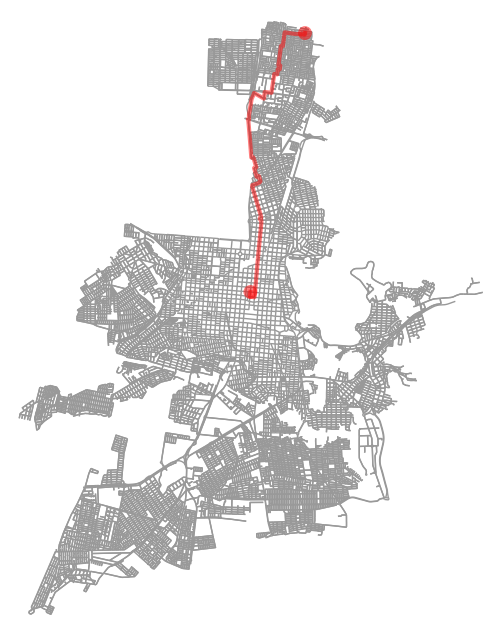


Graficando DFS...


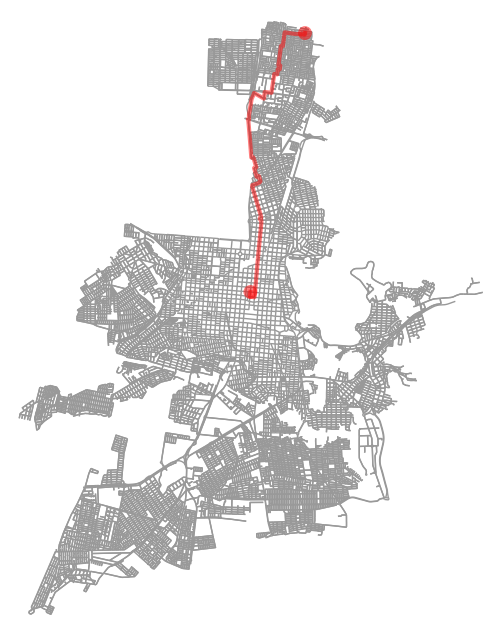


Graficando A*...


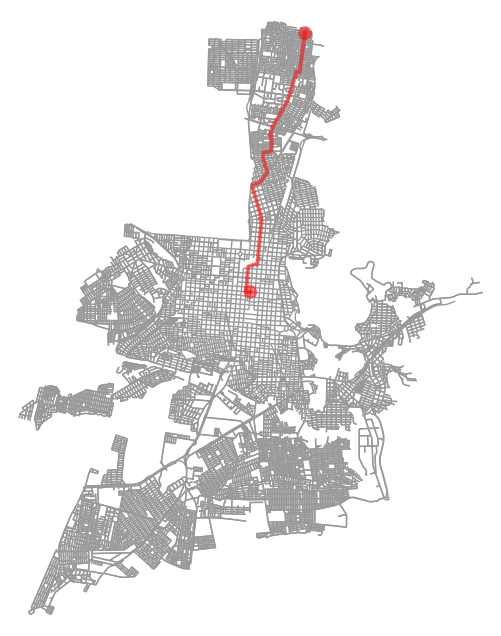

In [ ]:
# Calle Chalchaleros (Vaqueros)
chalchaleros = edges[edges['name'].astype(str).str.contains("Los Chalchaleros", case=False, na=False)]

# Calle Balcarce (Salta Capital)
balcarce = edges[edges['name'].astype(str).str.contains("Balcarce", case=False, na=False)]

# Nodos origen y destino
origen = chalchaleros.iloc[0]['u']
destino = balcarce.iloc[0]['u']


# Algoritmos de busqueda
def bfs_path(G, start, goal):
    path = nx.shortest_path(G, start, goal)
    visited = list(nx.bfs_tree(G, start).nodes())
    return path, visited

def dfs_path(G, start, goal):
    path = nx.shortest_path(G, start, goal)
    visited = list(nx.dfs_tree(G, start).nodes())
    return path, visited

def astar_path(G, start, goal):
    # Usamos la distancia euclidiana entre nodos como heurística
    path = nx.astar_path(G, start, goal, weight="length")
    visited = []  # networkx no devuelve nodos explorados directamente
    return path, visited


# Ejecución de comparación de resultados

results = [] #lista vacia donde se guardaran los resultados de cada iteración

for nombre, func in [("BFS", bfs_path), ("DFS", dfs_path), ("A*", astar_path)]:
  t0 = time.time()
  path, visited = func(graph_city, origen, destino)
  t1 = time.time()
  results.append({
      "Algoritmo": nombre,
      "Tiempo (s)": t1 - t0,
      "Nodos explorados": len(visited),
      "Longitud del camino": len(path) if path else None,
      "Path": path
  })

# Mostramos los resultados en una tabla
df = pd.DataFrame(results)
print(df)

#Grafica la ruta obtenida por cada algoritmo
for res in results:
    if res["Path"]:
        print(f"\nGraficando {res['Algoritmo']}...")
        ox.plot_graph_route(graph_city, res["Path"], route_linewidth=3, node_size=0, bgcolor="white")
